In [125]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


In [126]:
pip install kaggle


In [156]:
dataset = r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data"

In [157]:
with_mask_files = os.listdir(r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data\with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [158]:
without_mask_files = os.listdir(r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data\without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [159]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [160]:
# create the labels

with_mask_labels = [1]*3735

without_mask_labels = [0]*3831

In [161]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [162]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3735
3831


In [163]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7566
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


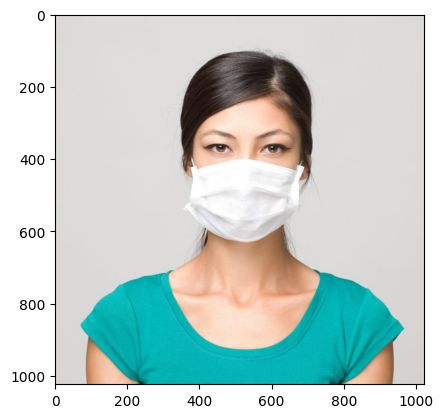

In [164]:
# displaying with mask image
img = mpimg.imread(r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data\with_mask\with_mask_3494.jpg")
imgplot = plt.imshow(img)
plt.show()

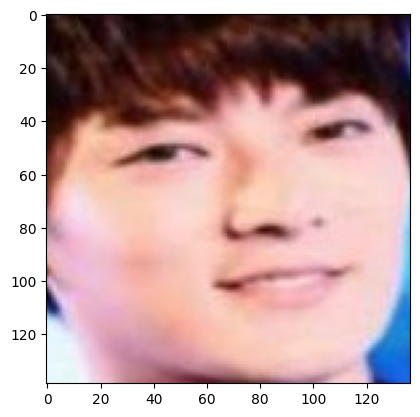

In [165]:
# displaying without mask image
img = mpimg.imread(r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data\without_mask\without_mask_25.jpg")
imgplot = plt.imshow(img)
plt.show()

In [187]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

with_mask_path = r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data\with_mask"
without_mask_path = r"C:\Users\aradh\OneDrive\Desktop\DataScience\maskdataset\data\without_mask"

data = []
labels = []  # Added list to store corresponding labels

without_mask_files = [
    f"without_mask_{i}.jpg" for i in range(1, 3726)
]
with_mask_files = [
    f"with_mask_{i}.jpg" for i in range(1, 3726)
]

# Process images with masks
for img_file in with_mask_files:
    image_path = os.path.join(with_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(1)  # 1 indicates 'with mask'

# Process images without masks
for img_file in without_mask_files:
    image_path = os.path.join(without_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(0)  # 0 indicates 'without mask'

# Convert data and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [188]:
type(data)

list

In [189]:
len(data)

7450

In [190]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [191]:
type(data[0])
data[0].shape

(128, 128, 3)

In [192]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [193]:
type(X)
type(Y)
print(X.shape)
print(Y.shape)

(7450, 128, 128, 3)
(7450,)


In [194]:
print(Y)

[1 1 1 ... 0 0 0]


In [195]:
print(X.shape, X_train.shape, X_test.shape)

(7450, 128, 128, 3) (5960, 128, 128, 3) (1490, 128, 128, 3)


In [196]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [197]:
X_train[0]

array([[[ 18,  17,  22],
        [ 18,  17,  22],
        [ 18,  17,  22],
        ...,
        [ 49,  46,  53],
        [ 46,  43,  50],
        [ 46,  43,  50]],

       [[ 18,  17,  22],
        [ 18,  17,  22],
        [ 18,  17,  22],
        ...,
        [ 49,  46,  53],
        [ 50,  47,  54],
        [ 51,  49,  56]],

       [[ 17,  16,  21],
        [ 17,  16,  21],
        [ 17,  16,  21],
        ...,
        [ 48,  44,  51],
        [ 55,  52,  59],
        [ 58,  55,  62]],

       ...,

       [[151, 119,  96],
        [152, 120,  97],
        [155, 123, 100],
        ...,
        [220, 218, 221],
        [214, 212, 215],
        [212, 210, 213]],

       [[151, 119,  96],
        [152, 120,  97],
        [155, 123, 100],
        ...,
        [222, 220, 223],
        [217, 215, 218],
        [215, 213, 216]],

       [[151, 119,  96],
        [152, 120,  97],
        [155, 123, 100],
        ...,
        [223, 221, 224],
        [218, 216, 219],
        [216, 214, 217]]

In [198]:
X_train_scaled[0]

array([[[0.07058824, 0.06666667, 0.08627451],
        [0.07058824, 0.06666667, 0.08627451],
        [0.07058824, 0.06666667, 0.08627451],
        ...,
        [0.19215686, 0.18039216, 0.20784314],
        [0.18039216, 0.16862745, 0.19607843],
        [0.18039216, 0.16862745, 0.19607843]],

       [[0.07058824, 0.06666667, 0.08627451],
        [0.07058824, 0.06666667, 0.08627451],
        [0.07058824, 0.06666667, 0.08627451],
        ...,
        [0.19215686, 0.18039216, 0.20784314],
        [0.19607843, 0.18431373, 0.21176471],
        [0.2       , 0.19215686, 0.21960784]],

       [[0.06666667, 0.0627451 , 0.08235294],
        [0.06666667, 0.0627451 , 0.08235294],
        [0.06666667, 0.0627451 , 0.08235294],
        ...,
        [0.18823529, 0.17254902, 0.2       ],
        [0.21568627, 0.20392157, 0.23137255],
        [0.22745098, 0.21568627, 0.24313725]],

       ...,

       [[0.59215686, 0.46666667, 0.37647059],
        [0.59607843, 0.47058824, 0.38039216],
        [0.60784314, 0

In [199]:
import tensorflow as tf
from tensorflow import keras

In [200]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [201]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [202]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
168/168 [==============================] - 21s 117ms/step - loss: 0.4800 - acc: 0.7949 - val_loss: 0.3014 - val_acc: 0.8859
Epoch 2/5
168/168 [==============================] - 19s 116ms/step - loss: 0.2995 - acc: 0.8826 - val_loss: 0.2422 - val_acc: 0.9010
Epoch 3/5
168/168 [==============================] - 20s 121ms/step - loss: 0.2493 - acc: 0.9077 - val_loss: 0.2348 - val_acc: 0.9010
Epoch 4/5
168/168 [==============================] - 20s 121ms/step - loss: 0.2011 - acc: 0.9219 - val_loss: 0.2999 - val_acc: 0.8742
Epoch 5/5
168/168 [==============================] - 21s 123ms/step - loss: 0.1871 - acc: 0.9301 - val_loss: 0.2239 - val_acc: 0.9228


In [203]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

47/47 [==============================] - 1s 25ms/step - loss: 0.1931 - acc: 0.9215
Test Accuracy = 0.9214764833450317


In [204]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

47/47 [==============================] - 1s 25ms/step - loss: 0.1931 - acc: 0.9215
Test Accuracy = 0.9214764833450317


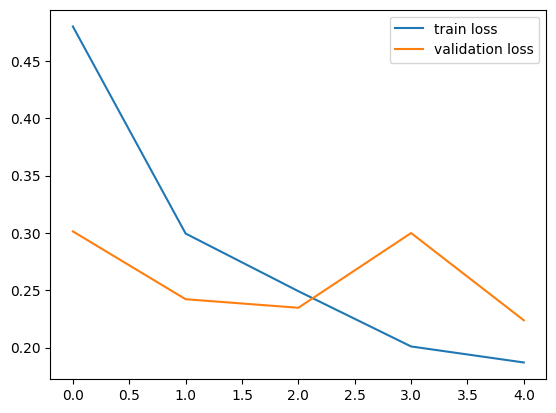

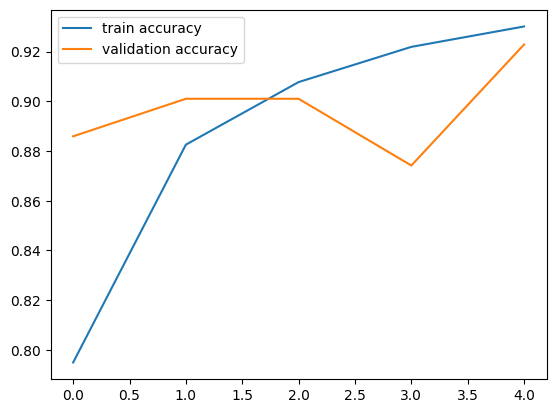

In [205]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [228]:
# Save the trained model
model.save('mask_detection_modell.keras')
print('Model saved as mask_detection_modell.keras')


Model saved as mask_detection_modell.keras


In [238]:
# Load the pre-trained model
loaded_model = keras.models.load_model('mask_detection_modell.keras')

# Get the input image path from user input
input_image_path = input('Path of the image to be predicted: ')

# Read the input image using OpenCV
input_image = cv2.imread(r"C:\Users\aradh\Downloads\S.jpeg")

# Display the input image using cv2.imshow
cv2.imshow('Input Image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Preprocess the input image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Make predictions using the model
input_prediction = loaded_model.predict(input_image_reshaped)

# Display the raw prediction output
print("Raw Prediction:", input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the predicted label
print("Predicted Label:", input_pred_label)

# Provide a human-readable interpretation of the prediction
if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')


1/1 [==============================] - 0s 68ms/step
Raw Prediction: [[0.8503953 0.3290938]]
Predicted Label: 0
The person in the image is wearing a mask
